   # Captivity and Aquarium Yelp Reviews
   In this Exploritory Data Analysis the goal is to determine if there is a correlation between the release of Blackfish and a increase in negative reviews or more reviews related to anti-captivity sentiment. Blackfish is a documetary that dived into questionable treatment of Shamu. We are interested in the correlation between the increased in anti-captivity sentiment and the ratings aquariums recieve.

   In order to look at this correlation we look at data collected from Yelp. Looking at reviews from Monterey Bay Aquarium and Seaworld CA. We can analyse keywords in reviews and relate them to ratings of certain groups. 
   
   First we look at the seperated each word submitted into the reviews to look at what words are the most common. This also allows us to look up the number of time certain words are used.
   
   Second, break down reviews into certain groups based on key words found in the review. There are 3 groups of interest:
       
    Group0: is a group with keywords that are reflective of positive experiences 
    Group1: is a group with keywords that a reflective of negative experiences
    Group2: is a groups with keywords that relate to anti-captivity sentiment or pertaining to whales
   
  Then analyse these groups and see if there is a distinction.
  
  Third, Look into how these groups relate to eachother over time. Along with looking at how Blackfish popularity of time is reflected on Google Trends
  
         

In [1]:
# Son Phan 862042081
# Edward Dickoff

import pandas as pd
import re
import nltk
import numpy as np
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [2]:
df = pd.read_csv('montereyreviews.csv')
df

,Unnamed: 0,Date,Rating,Review
0,0,2020-02-28,5,Ya know we all went here as a 1st grade field ...
1,1,2020-02-25,5,I first came here for a field trip way back in...
2,2,2020-02-20,4,I visited Monterey Bay Aquarium for the first ...
3,3,2020-02-19,3,I came here for my first time in 2005 and it w...
4,4,2020-02-11,5,Great place to go for groups of all ages! Not...
...,...,...,...,...
4095,4095,2010-01-10,2,The only part I enjoyed was the sea otters. so...
4096,4096,2010-03-22,5,Amazing place for everyone. It might be too cr...
4097,4097,2008-10-10,4,Fun Fun Fun many thinggs to do and a lot of th...
4098,4098,2009-02-21,5,Just as great as an adult! As one magazine br...


In [3]:
# When scraping the reviews, did not consider <br\> points in texts. Need to add spaces before to counteract.
def capital_words_spaces(str1):
    return re.sub(r"(\w)([A-Z])", r"\1 \2", str1)

In [4]:
test = df['Review'].apply(capital_words_spaces)
test

0       Ya know we all went here as a 1st grade field ...
1       I first came here for a field trip way back in...
2       I visited Monterey Bay Aquarium for the first ...
3       I came here for my first time in 2005 and it w...
4       Great place to go for groups of all ages!  Not...
                              ...                        
4095    The only part I enjoyed was the sea otters. so...
4096    Amazing place for everyone. It might be too cr...
4097    Fun Fun Fun many thinggs to do and a lot of th...
4098    Just as great as an adult!  As one magazine br...
4099    i recently went to the aquarium during spring ...
Name: Review, Length: 4100, dtype: object

In [5]:
# Split text for each row into list of words
split_words = test.str.split()
tokens = []
    
# Append each list of words into a bigger list, tokens    
for x in split_words:
    tokens.append(x)

# Flatten our lists of lists into one big list of words
tokens = [item for sublist in tokens for item in sublist]
    

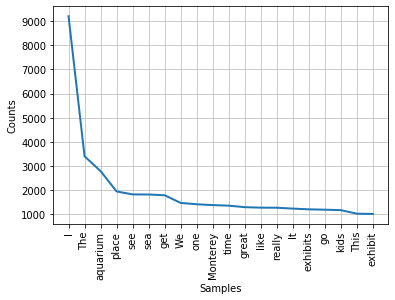

In [6]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
#for key,val in freq.items():
#    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)


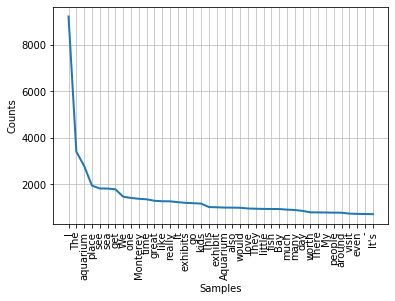

In [7]:
freq.plot(40, cumulative=False)

The objective is to try and corrolate animals and certifications to user reviews and ratings. lets first look at a selection of animals and the number of times they are referenced in the reviews for Monterey Bay Aquarium on Yelp.

In [8]:
#freq
#print(freq.has_key("c"))
#freq.plot(10)
word_of_interest = ['zebra', 'penguin', 'whale', 'octopus', 'killer', 'shamu', 'fish', 'shark', 'ocean', 'eel', 'seal', 'star', 'starfish', 'Spongebob', 'coral', 'plastic']
numbers = []
for items in range(len(word_of_interest)):
    print(word_of_interest[items], freq[word_of_interest[items]])
    numbers.append(freq[word_of_interest[items]])
    



zebra 1
penguin 127
whale 40
octopus 123
killer 5
shamu 0
fish 948
shark 166
ocean 435
eel 7
seal 12
star 117
starfish 61
Spongebob 3
coral 24
plastic 43


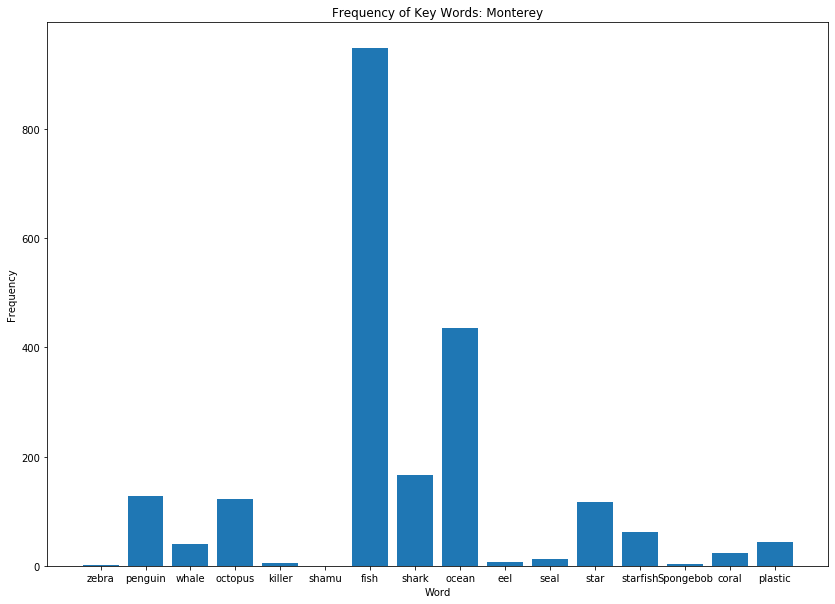

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,10))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequency of Key Words: Monterey')
plt.bar(word_of_interest, numbers)
plt.show()

# Correlation to Phrases
Next Lets look at the correlation between certain animals and ratings given
we are going to look at the average rating for groups of users using certain words or phrases:
                           
    group 1 (happy group): 'great', 'happy', 'fantastic', 'lovely'
   
    group 2 (angry group): 'sad', 'angry', 'mad', 'terrible'
    
    group 3 (animals in captivity): 'mamal', 'whale, 'porpoise', 'captivity'
    
    group 4: overall review


In [10]:
df = pd.read_csv('montereyreviews.csv')
df['Review'] = df['Review'].apply(capital_words_spaces)
#get arride of caps to make easier for identifying unique phrases
df['Review'] = df['Review'].str.lower() 
df.head()


,Unnamed: 0,Date,Rating,Review
0,0,2020-02-28,5,ya know we all went here as a 1st grade field ...
1,1,2020-02-25,5,i first came here for a field trip way back in...
2,2,2020-02-20,4,i visited monterey bay aquarium for the first ...
3,3,2020-02-19,3,i came here for my first time in 2005 and it w...
4,4,2020-02-11,5,great place to go for groups of all ages! not...


In [11]:
pip install gtk

  Could not find a version that satisfies the requirement gtk (from versions: )
No matching distribution found for gtk
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


countGroup0: 1879 countGroup1: 146 countGroup2: 119


4.458222458754657

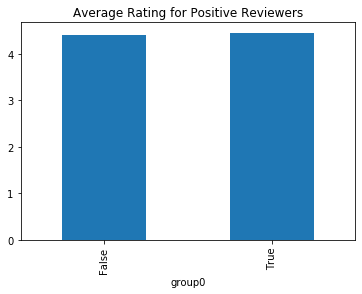

In [12]:
df2 = df
#print(df2.head())
group0 = [' great ', ' happy ', ' fantastic ', ' lovely ', 'good', ' enjoyed ', ' loved ', ' amazing ', ' informative ', ' joy ']
group1 = [' sad ', ' angry ', ' mad ', ' terrible ', ' disappointed ', ' cry ', ' crying ', ' overpriced ', ' boring ', ' dumb ' ]
group2 = [' mammal ', ' mammals ', ' whale ',  ' whales ', ' porpoise ', ' captivity ', ' cages ', ' cage ', ' blackfish ', ' shamu ']

array = [group0, group1, group2]
group3 = df["Rating"].mean()

#array[0][0]
i = 0
#loop throught the array construct each truth value of existance of keyword and then make groups into the OR value of those columns
for items in array:
    for item in items:
        df2[item] = df2.astype(str).sum(axis=1).str.contains(item)
    df['group' + str(i)] = df2[array[i][0]] | df2[array[i][1]] | df2[array[i][2]] | df2[array[i][3]] | df2[array[i][4]] | df2[array[i][5]]
    i += 1
    
#df.groupby(['year_bin']).mean()['duration'].plot(kind = 'bar', title = 'Average Duration per time zone')
group0_counts = df.group0.value_counts()
group1_counts = df.group1.value_counts()
group2_counts = df.group2.value_counts()
print('countGroup0:', group0_counts[1],'countGroup1:', group1_counts[1],'countGroup2:', group2_counts[1])
#df.head()
#percent_true_g0 = group0_counts[1]/group0_counts[0]
#percent_true_g1 = group1_counts[1]/group0_counts[0]
#percent_true_g2 = group2_counts[1]/group0_counts[0]
df.groupby(['group0']).mean()['Rating'].plot(kind = 'bar', title = 'Average Rating for Positive Reviewers')
df.groupby(['group0']).mean()['Rating'][1]

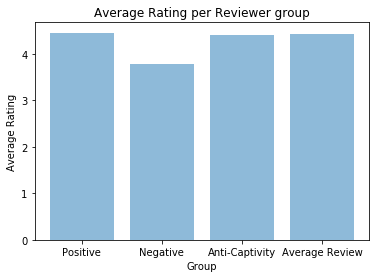

In [13]:
groups = (df.groupby(['group0']).mean()['Rating'][1], df.groupby(['group1']).mean()['Rating'][1], df.groupby(['group2']).mean()['Rating'][1], group3)
labels = ('Positive', 'Negative', 'Anti-Captivity', 'Average Review')
y_pos = np.arange(len(labels))
data = groups
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Average Rating')
plt.xlabel('Group')
plt.title('Average Rating per Reviewer group')
plt.show()

Now looking at ratings over time 

need to change the Date from object to actual pandas date

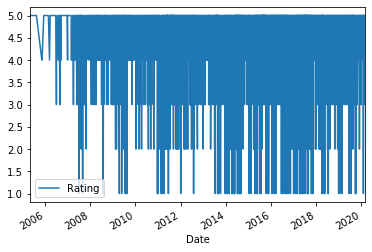

In [14]:

df['Date']

df['Date'] = pd.to_datetime(df['Date'])

#df['Date'].dtypes

df.plot(x = 'Date', y = 'Rating')

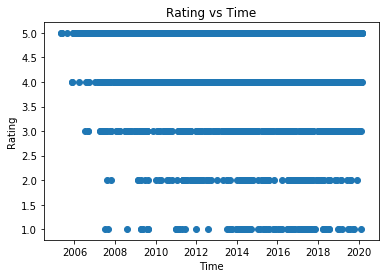

In [15]:
fig=plt.figure()
plt.scatter(df.Date, df.Rating)
axis = fig.gca() #get current axis
axis.set_title('Rating vs Time')
axis.set_xlabel('Time')
axis.set_ylabel('Rating')
fig.canvas.draw()

year_bin
2006    4.534545
2007    4.349265
2008    4.553114
2009    4.301818
2010    4.477941
2011    4.437956
2012    4.194139
2013    4.395604
2014    4.527473
2015    4.608059
2016    4.208029
2017    4.368613
2018    4.406593
2019    4.509158
2020    4.542125
Name: Rating, dtype: float64

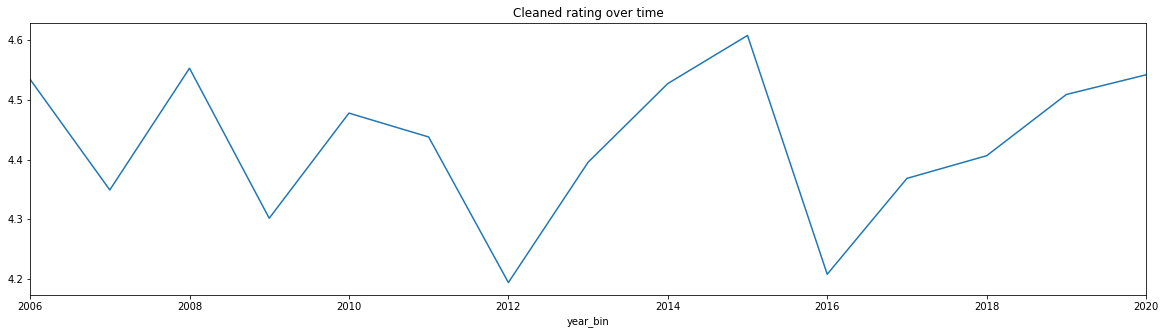

In [16]:
df = df.sort_values(by='Date')
labels=[ "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
df['year_bin']=pd.qcut(df['Date'], q=15, labels=[ "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])


#df2 = df.groupby(['year_bin']).mean()['imdb_score'].plot(kind = 'bar')

df.groupby(['year_bin']).mean()['Rating'].plot(title = 'Cleaned rating over time', figsize=(20, 5))
df.groupby(['year_bin']).mean()['Rating']

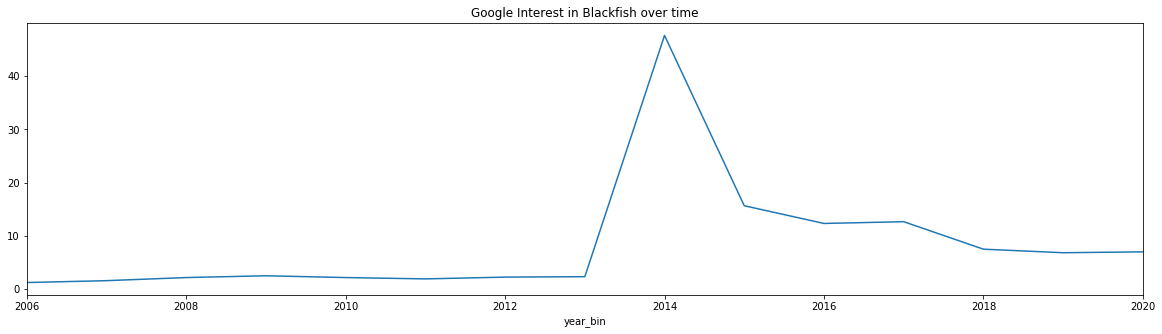

In [17]:
df_blackfish = pd.read_csv('multiTimeline.csv')

df_blackfish.head(20)

df_blackfish['Date'] = pd.to_datetime(df_blackfish['Date'])
df_blackfish.dtypes
df_blackfish['year_bin']=pd.qcut(df_blackfish['Date'], q=15, labels=[ "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

df_blackfish.groupby(['year_bin']).mean()['Interest'].plot(title = 'Google Interest in Blackfish over time', figsize=(20, 5))

We do not see any correlation between negative reviews and the increase in popularity of Blackfish.

Next lets look at the number of reviews above and below 2.5 stars. Is there a difference number of lower reviews for each group? let us find out! Maybe over time.

In [18]:
df.head()

,Unnamed: 0,Date,Rating,Review,great,happy,fantastic,lovely,good,enjoyed,...,whale,whales,porpoise,captivity,cages,cage,blackfish,shamu,group2,year_bin
3242,3242,2005-05-08,5,i can't believe i am the first one to rate thi...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
3781,3781,2005-05-10,5,i think the world would be a better place if w...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
3360,3360,2005-05-27,5,this is my favorite aquarium on the west coast...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
3927,3927,2005-08-17,5,"what a great experience, i only wish i could'v...",True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,2006
2517,2517,2005-11-12,4,loved this place. generally i get bored very e...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006


In [19]:
#get each group as the dataframe where the group exists and the reating is either 
# high: >= 2.5 or low: < 2.5 
#group0_low = df[ (df['group0'] == True) & (df['Rating'] < 2.5)]
#group0_high = df[ (df['group0'] == True) & (df['Rating'] >= 2.5)]
#group1_low = df[ (df['group1'] == True) & (df['Rating'] < 2.5)]
#group1_high = df[ (df['group1'] == True) & (df['Rating'] >= 2.5)]
#group2_low = df[ (df['group2'] == True) & (df['Rating'] < 2.5)]
#group2_high = df[ (df['group2'] == True) & (df['Rating'] >= 2.5)]

#declare arrays for the countes 
group0_count_low= [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
group0_count_high= [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
group1_count_low= [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
group1_count_high= [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
group2_count_low = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
group2_count_high = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

#get the counts of each groups of high or low per bin year and assemple into an array
for i in range(len(labels)):
    group0_count_low[i]=df[ (df['group0'] == True) & (df['Rating'] < 2.5) & (df['year_bin'] == labels[i])].count()[0]
    group0_count_high[i]=df[ (df['group0'] == True) & (df['Rating'] >= 2.5) & (df['year_bin'] == labels[i])].count()[0]
    group1_count_low[i]=df[ (df['group1'] == True) & (df['Rating'] < 2.5) & (df['year_bin'] == labels[i])].count()[0]
    group1_count_high[i]=df[ (df['group1'] == True) & (df['Rating'] >= 2.5) & (df['year_bin'] == labels[i])].count()[0]
    group2_count_low[i]=df[ (df['group2'] == True) & (df['Rating'] < 2.5) & (df['year_bin'] == labels[i])].count()[0]
    group2_count_high[i]=df[ (df['group2'] == True) & (df['Rating'] >= 2.5) & (df['year_bin'] == labels[i])].count()[0]
    #group0_count_low[i] = group0_low[group0_low['year_bin'] == labels[i]].count()[0]
    #group0_count_high[i] = group0_high[group0_high['year_bin'] == labels[i]].count()[0]
    #group1_count_low[i] = group1_low[group1_low['year_bin'] == labels[i]].count()[0]
    #group1_count_high[i] = group1_high[group1_high['year_bin'] == labels[i]].count()[0]
    #group2_count_low[i] = group2_low[group2_low['year_bin'] == labels[i]].count()[0]
    #group2_count_high[i] = group2_high[group2_high['year_bin'] == labels[i]].count()[0]

#print arrays
print('count of low and high tuples over years')
print(group0_count_low)
print(group0_count_high)
print(group1_count_low)
print(group1_count_high)
print(group2_count_low)
print(group2_count_high)

#for year in range(len(labels)):
#    group0_count_high[year] = group0_high[group0_high['year_bin'] == labels[year]].count()[0]

#for year in range(len(labels)):
#    group0_count_low[year] = group0_low[group0_low['year_bin'] == labels[year]].count()[0]

#group0_count_high


count of low and high tuples over years
[1, 2, 4, 10, 7, 2, 6, 7, 3, 4, 10, 3, 5, 3, 2]
[127, 138, 126, 122, 125, 102, 135, 112, 126, 113, 115, 129, 110, 120, 110]
[0, 0, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 1, 1, 4]
[9, 12, 7, 12, 5, 12, 12, 6, 7, 8, 6, 7, 6, 7, 7]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 0]
[11, 8, 8, 12, 12, 9, 3, 6, 10, 6, 6, 8, 5, 5, 3]


['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


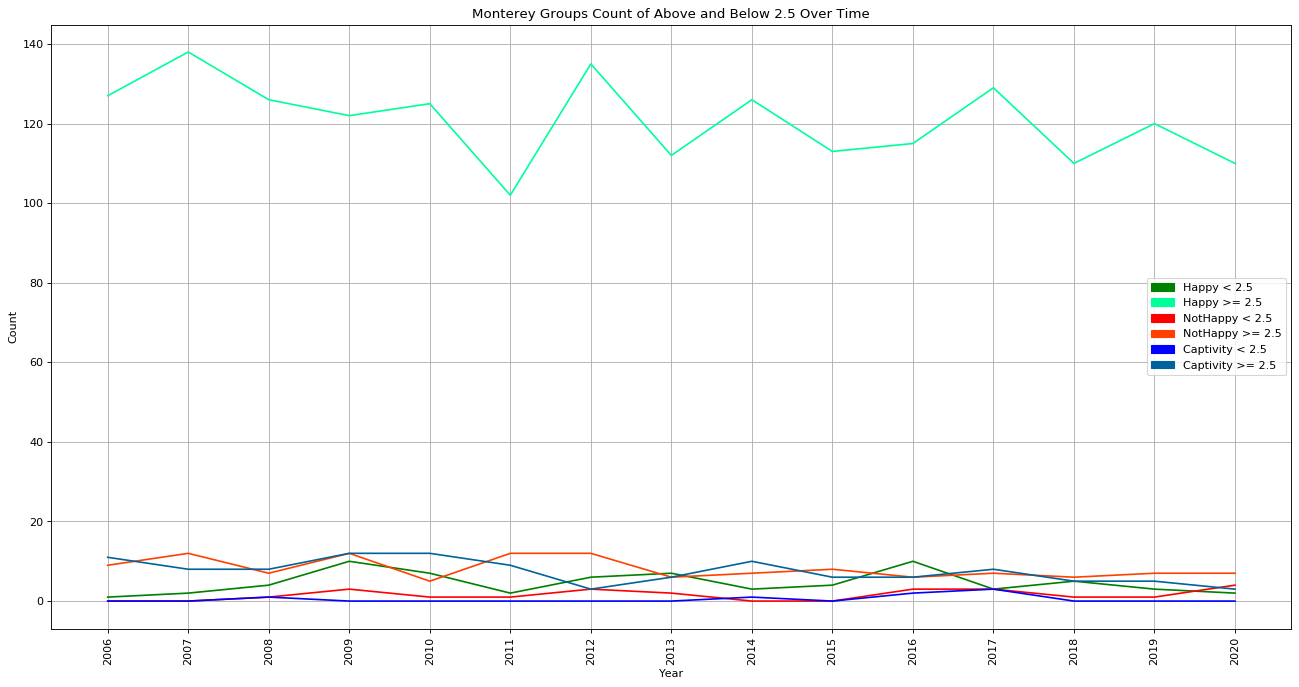

In [20]:
#             Now lets graphs it02
import matplotlib.patches as mpatches
import numpy
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

#Looking at the number of reviews in group0 above 2.5
#labels are the dates from previous
print(labels)

plt.plot(group0_count_low, color = 'green')
plt.plot(group0_count_high, color = '#00FF9B')
plt.plot(group1_count_low, color = 'red')
plt.plot(group1_count_high, color = '#FF4100')
plt.plot(group2_count_low, color = 'blue')
plt.plot(group2_count_high, color = '#00639B')

plt.title('Monterey Groups Count of Above and Below 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='green', label='Happy < 2.5')
l_green_patch = mpatches.Patch(color='#00FF9B', label='Happy >= 2.5')
red_patch = mpatches.Patch(color='red', label='NotHappy < 2.5')
l_red_patch = mpatches.Patch(color='#FF4100', label='NotHappy >= 2.5')
blue_patch = mpatches.Patch(color='blue', label='Captivity < 2.5')
l_blue_patch = mpatches.Patch(color='#00639B', label='Captivity >= 2.5')
plt.legend(handles=[green_patch, l_green_patch, red_patch, l_red_patch, blue_patch, l_blue_patch])

plt.grid(True)

plt.show()

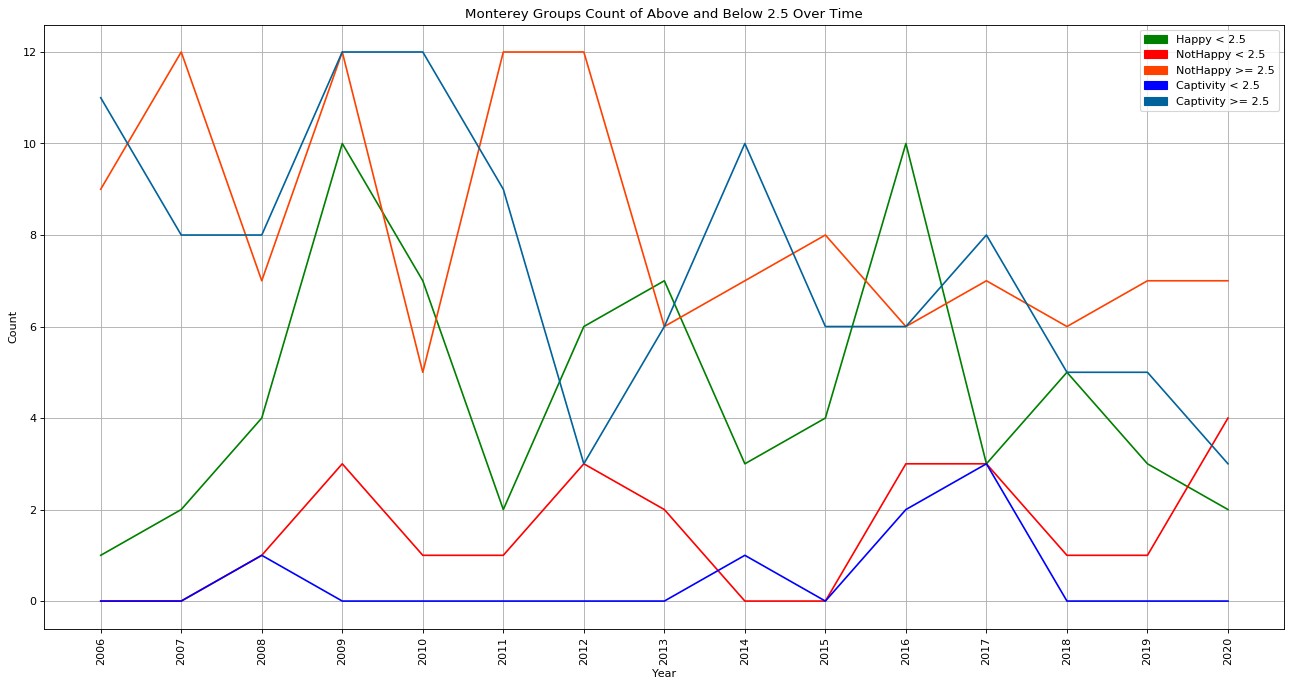

In [21]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(group0_count_low, color = 'green')
plt.plot(group1_count_low, color = 'red')
plt.plot(group1_count_high, color = '#FF4100')
plt.plot(group2_count_low, color = 'blue')
plt.plot(group2_count_high, color = '#00639B')

plt.title('Monterey Groups Count of Above and Below 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='green', label='Happy < 2.5')
red_patch = mpatches.Patch(color='red', label='NotHappy < 2.5')
l_red_patch = mpatches.Patch(color='#FF4100', label='NotHappy >= 2.5')
blue_patch = mpatches.Patch(color='blue', label='Captivity < 2.5')
l_blue_patch = mpatches.Patch(color='#00639B', label='Captivity >= 2.5')
plt.legend(handles=[green_patch, red_patch, l_red_patch, blue_patch, l_blue_patch])

plt.grid(True)

plt.show()

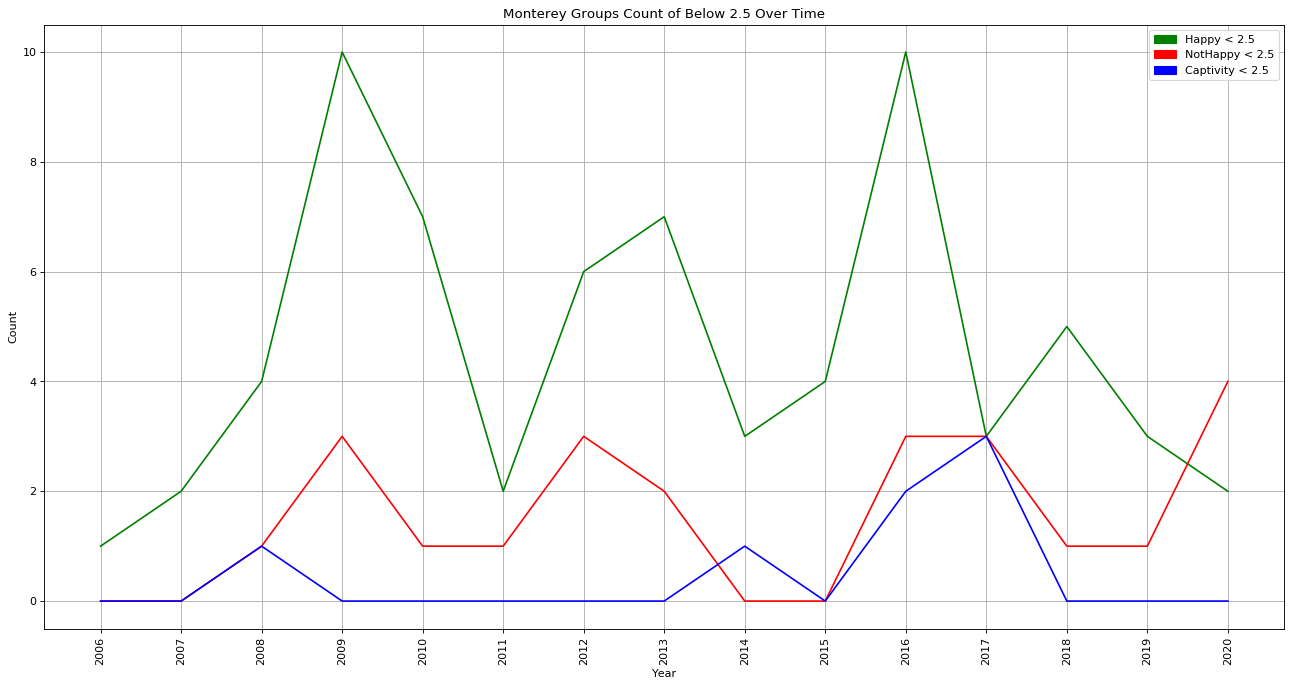

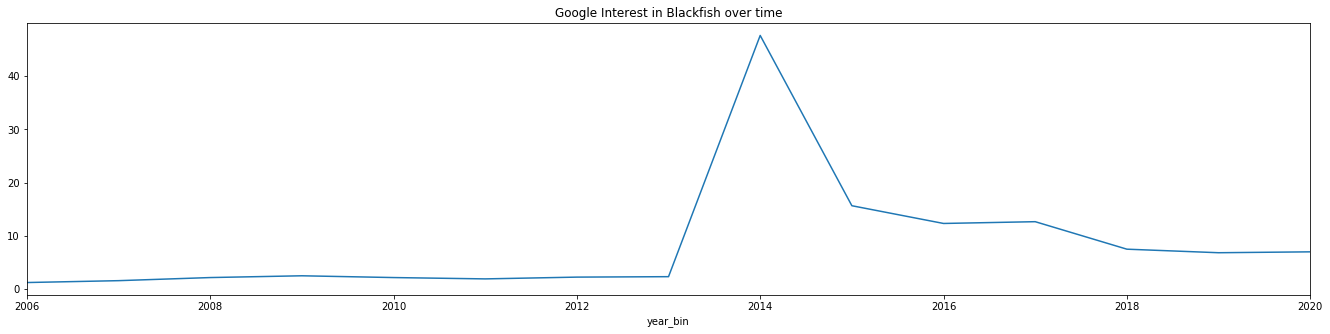

In [22]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(group0_count_low, color = 'green')
plt.plot(group1_count_low, color = 'red')
plt.plot(group2_count_low, color = 'blue')

plt.title('Monterey Groups Count of Below 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='green', label='Happy < 2.5')
red_patch = mpatches.Patch(color='red', label='NotHappy < 2.5')
blue_patch = mpatches.Patch(color='blue', label='Captivity < 2.5')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.grid(True)

plt.show()
df_blackfish.groupby(['year_bin']).mean()['Interest'].plot(title = 'Google Interest in Blackfish over time', figsize=(23, 5))

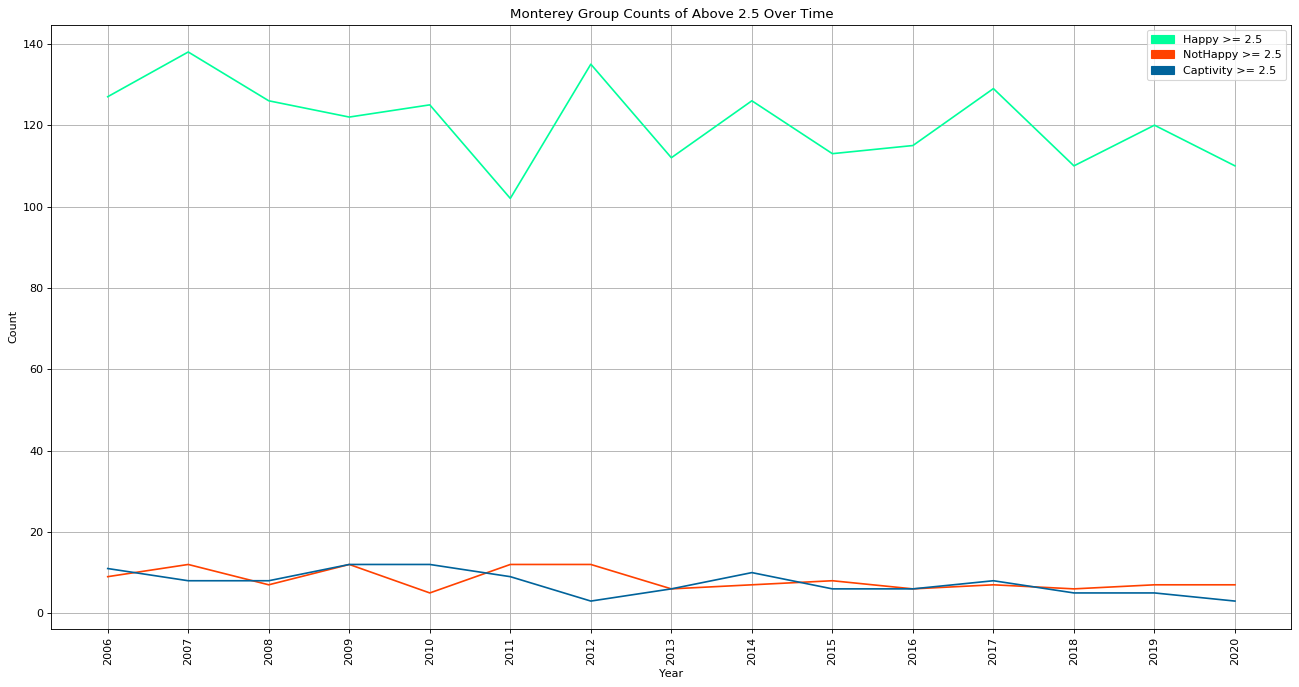

In [23]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(group0_count_high, color = '#00FF9B')
plt.plot(group1_count_high, color = '#FF4100')
plt.plot(group2_count_high, color = '#00639B')

plt.title('Monterey Group Counts of Above 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='#00FF9B', label='Happy >= 2.5')
red_patch = mpatches.Patch(color='#FF4100', label='NotHappy >= 2.5')
blue_patch = mpatches.Patch(color='#00639B', label='Captivity >= 2.5')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.grid(True)

plt.show()

# Seaworld Correlation to Phrases
Next Lets look at the correlation between certain animals and ratings given, with Seaworld
we are going to look at the average rating for groups of users using certain words or phrases:



In [24]:

df_sea = pd.read_csv('seaworlds.csv')

print(list(df_sea.columns))

#df_sea['Review'] = df_sea['Review'].apply(capital_words_spaces)
#get arride of caps to make easier for identifying unique phrases
df_sea['Review'] = df_sea['Review'].str.lower() 
df.head()

#df_sea = df_sea.loc[:, df.columns.notnull()]
df_sea.head()
#df_seaworld.head()

['Number', 'Date', 'Rating', 'Review']


,Number,Date,Rating,Review
0,0,2/28/2020,4.0,**bags and backpacks are not allowed on some r...
1,1,2/21/2020,4.0,family went on a weekday which was wonderful a...
2,2,2/1/2020,5.0,we always have a great time. â we have season ...
3,3,1/3/2020,5.0,considering i live in san diego this is pretty...
4,4,12/7/2019,4.0,"sea world is adding more rides, attractions â ..."


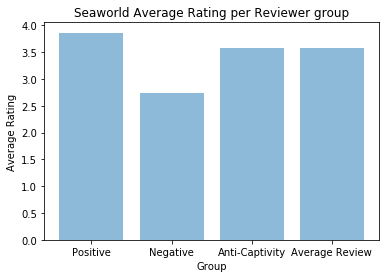

In [39]:
df2_sea = df_sea
array = [group0, group1, group2]
group3 = df_sea["Rating"].mean()

#array[0][0]
i = 0
#loop throught the array construct each truth value of existance of keyword and then make groups into the OR value of those columns
for items in array:
    for item in items:
        df2_sea[item] = df2_sea.astype(str).sum(axis=1).str.contains(item)
    df_sea['group' + str(i)] = df2_sea[array[i][0]] | df2_sea[array[i][1]] | df2_sea[array[i][2]] | df2_sea[array[i][3]] | df2_sea[array[i][4]] | df2_sea[array[i][5]] 
    i += 1
    
#df.groupby(['year_bin']).mean()['duration'].plot(kind = 'bar', title = 'Average Duration per time zone')
group0_counts = df_sea.group0.value_counts()
group1_counts = df_sea.group1.value_counts()
group2_counts = df_sea.group2.value_counts()

groups = (df_sea.groupby(['group0']).mean()['Rating'][1], df_sea.groupby(['group1']).mean()['Rating'][1], df_sea.groupby(['group2']).mean()['Rating'][1], group3)
labels = ('Positive', 'Negative', 'Anti-Captivity', 'Average Review')
y_pos = np.arange(len(labels))
data = groups
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Average Rating')
plt.xlabel('Group')
plt.title('Seaworld Average Rating per Reviewer group')
plt.show()

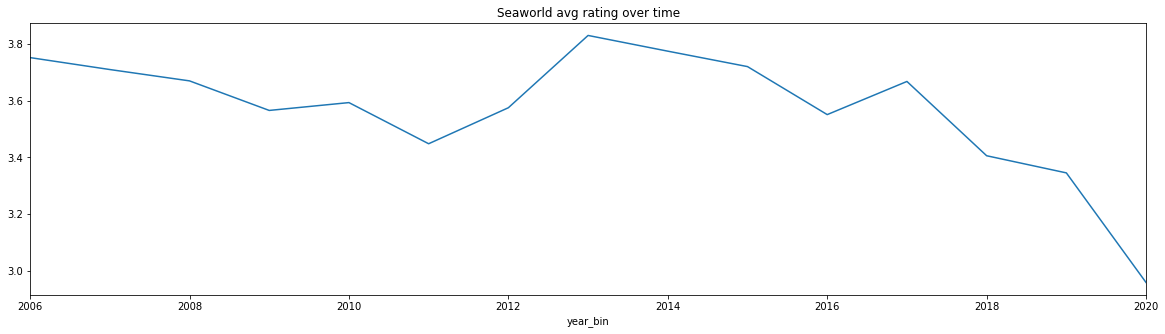

In [40]:
df_sea['Date'] = pd.to_datetime(df_sea['Date'])

df_sea = df_sea.sort_values(by='Date')
labels=[ "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
df_sea['year_bin']=pd.qcut(df_sea['Date'], q=15, labels=[ "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

df_sea.head()
#df2 = df.groupby(['year_bin']).mean()['imdb_score'].plot(kind = 'bar')

df_sea.groupby(['year_bin']).mean()['Rating'].plot(title = 'Seaworld avg rating over time', figsize=(20, 5))
#df_sea.groupby(['year_bin']).mean()['Rating']

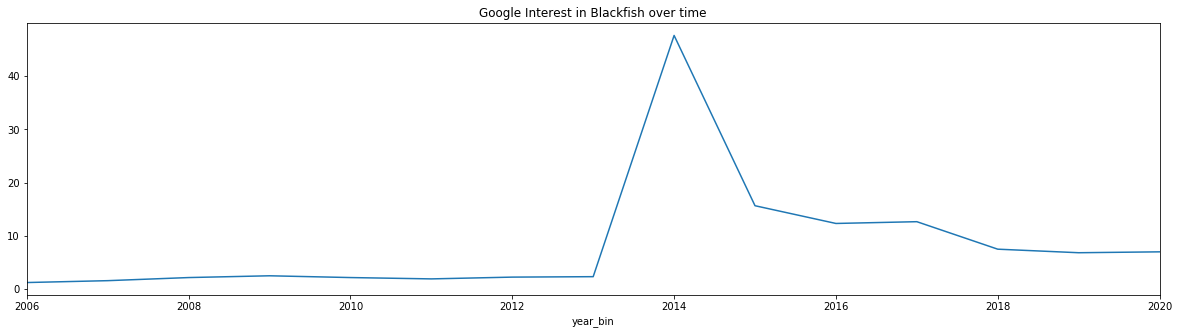

In [41]:
df_blackfish.groupby(['year_bin']).mean()['Interest'].plot(title = 'Google Interest in Blackfish over time', figsize=(20.3, 5))

In [42]:
for i in range(len(labels)):
    group0_count_low[i]=df_sea[ (df_sea['group0'] == True) & (df_sea['Rating'] < 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]
    group0_count_high[i]=df_sea[ (df_sea['group0'] == True) & (df_sea['Rating'] >= 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]
    group1_count_low[i]=df_sea[ (df_sea['group1'] == True) & (df_sea['Rating'] < 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]
    group1_count_high[i]=df_sea[ (df_sea['group1'] == True) & (df_sea['Rating'] >= 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]
    group2_count_low[i]=df_sea[ (df_sea['group2'] == True) & (df_sea['Rating'] < 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]
    group2_count_high[i]=df_sea[ (df_sea['group2'] == True) & (df_sea['Rating'] >= 2.5) & (df_sea['year_bin'] == labels[i])].count()[0]

print('count of low and high tuples over years')
print(group0_count_low)
print(group0_count_high)
print(group1_count_low)
print(group1_count_high)
print(group2_count_low)
print(group2_count_high)

count of low and high tuples over years
[10, 11, 13, 10, 10, 17, 13, 8, 7, 7, 12, 8, 9, 13, 14]
[95, 84, 72, 78, 88, 74, 80, 85, 83, 80, 74, 73, 67, 65, 60]
[1, 4, 3, 6, 7, 7, 4, 4, 6, 8, 10, 5, 13, 7, 14]
[9, 12, 7, 5, 4, 13, 8, 10, 8, 11, 2, 9, 4, 5, 5]
[4, 9, 8, 9, 5, 19, 7, 4, 8, 3, 5, 1, 7, 5, 2]
[28, 33, 26, 34, 33, 24, 22, 22, 28, 30, 15, 14, 15, 13, 6]


['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


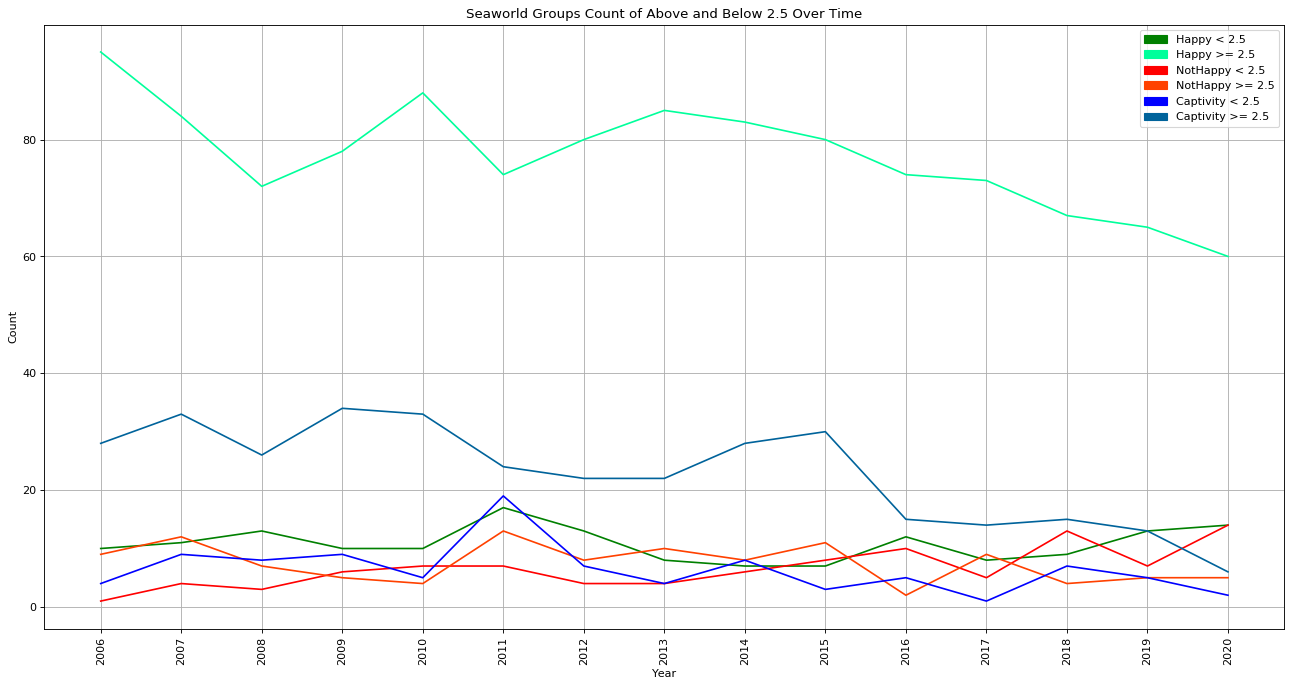

In [43]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

#Looking at the number of reviews in group0 above 2.5
#labels are the dates from previous
print(labels)

plt.plot(group0_count_low, color = 'green')
plt.plot(group0_count_high, color = '#00FF9B')
plt.plot(group1_count_low, color = 'red')
plt.plot(group1_count_high, color = '#FF4100')
plt.plot(group2_count_low, color = 'blue')
plt.plot(group2_count_high, color = '#00639B')

plt.title('Seaworld Groups Count of Above and Below 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='green', label='Happy < 2.5')
l_green_patch = mpatches.Patch(color='#00FF9B', label='Happy >= 2.5')
red_patch = mpatches.Patch(color='red', label='NotHappy < 2.5')
l_red_patch = mpatches.Patch(color='#FF4100', label='NotHappy >= 2.5')
blue_patch = mpatches.Patch(color='blue', label='Captivity < 2.5')
l_blue_patch = mpatches.Patch(color='#00639B', label='Captivity >= 2.5')
plt.legend(handles=[green_patch, l_green_patch, red_patch, l_red_patch, blue_patch, l_blue_patch])

plt.grid(True)

plt.show()

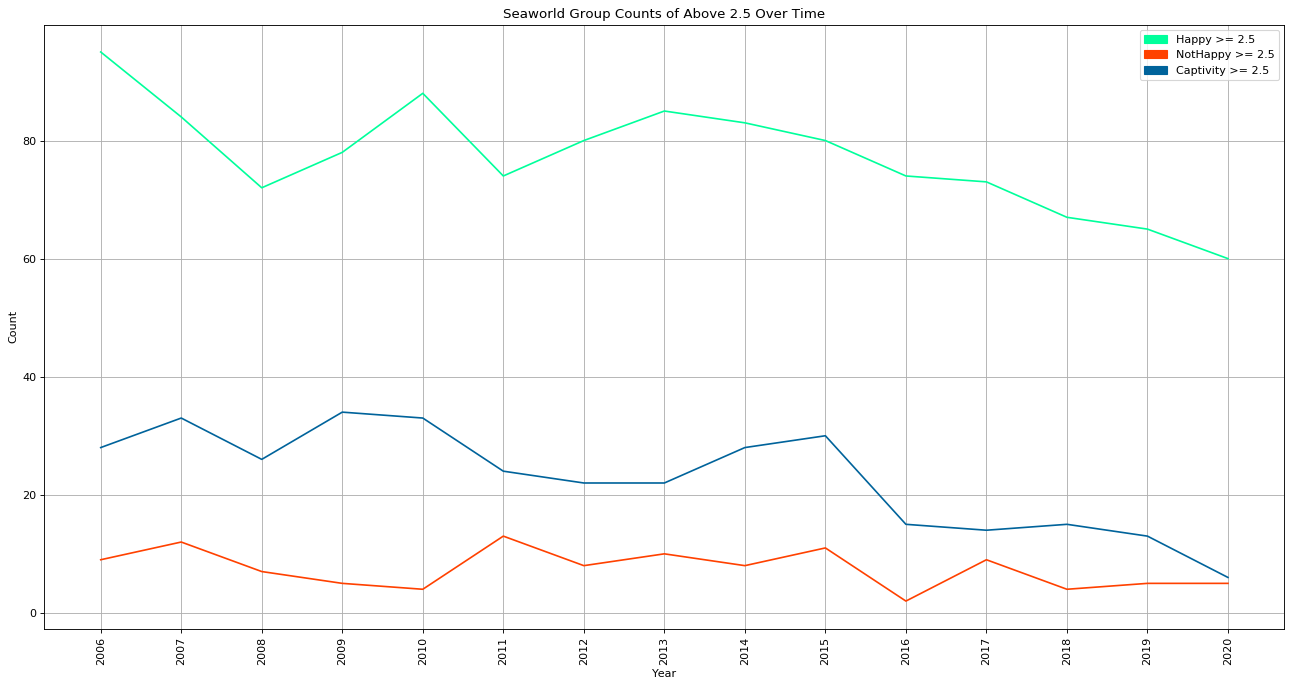

In [44]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(group0_count_high, color = '#00FF9B')
plt.plot(group1_count_high, color = '#FF4100')
plt.plot(group2_count_high, color = '#00639B')

plt.title('Seaworld Group Counts of Above 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='#00FF9B', label='Happy >= 2.5')
red_patch = mpatches.Patch(color='#FF4100', label='NotHappy >= 2.5')
blue_patch = mpatches.Patch(color='#00639B', label='Captivity >= 2.5')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.grid(True)

plt.show()

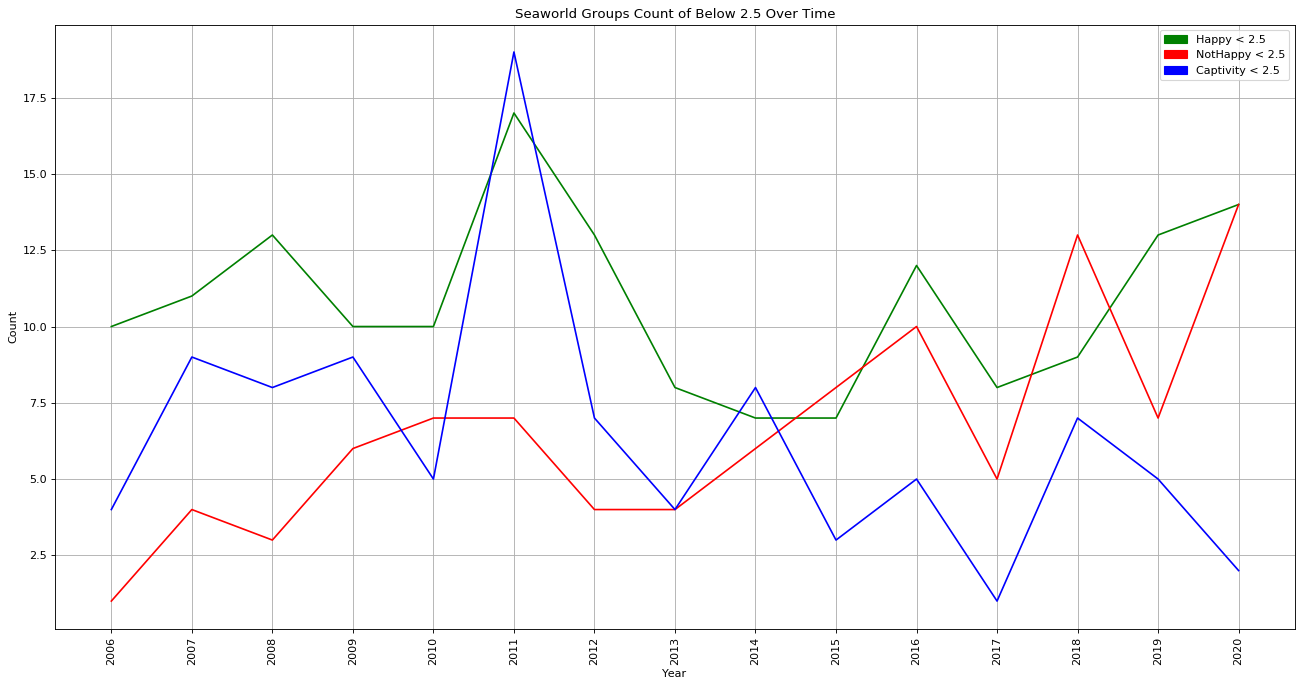

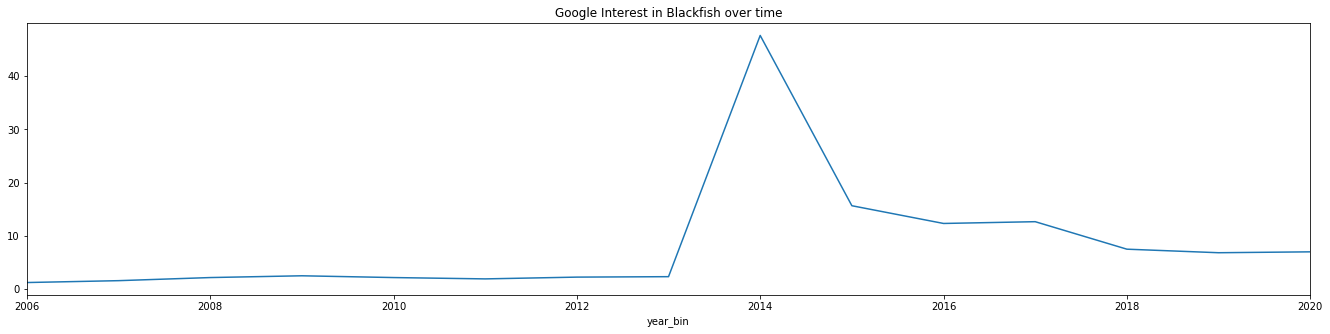

In [45]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(group0_count_low, color = 'green')
plt.plot(group1_count_low, color = 'red')
plt.plot(group2_count_low, color = 'blue')

plt.title('Seaworld Groups Count of Below 2.5 Over Time')
plt.ylabel('Count')
plt.xlabel('Year')

plt.xticks(numpy.arange(len(labels)), labels, rotation = 90) #y_pos, labels)

#legend
green_patch = mpatches.Patch(color='green', label='Happy < 2.5')
red_patch = mpatches.Patch(color='red', label='NotHappy < 2.5')
blue_patch = mpatches.Patch(color='blue', label='Captivity < 2.5')
plt.legend(handles=[green_patch, red_patch, blue_patch])

plt.grid(True)

plt.show()
df_blackfish.groupby(['year_bin']).mean()['Interest'].plot(title = 'Google Interest in Blackfish over time', figsize=(23, 5))

There is a slight trend where the number of reviews under 2.5 for the group associated with anti-captivity increases relative to the increase in Blackfish interest. But it is not very significant. This might be a case of Survivors Bias. Meaning the data we are looking for may just not exist. People that are against captivity are not likely support an aquarium and go to aquariums. 


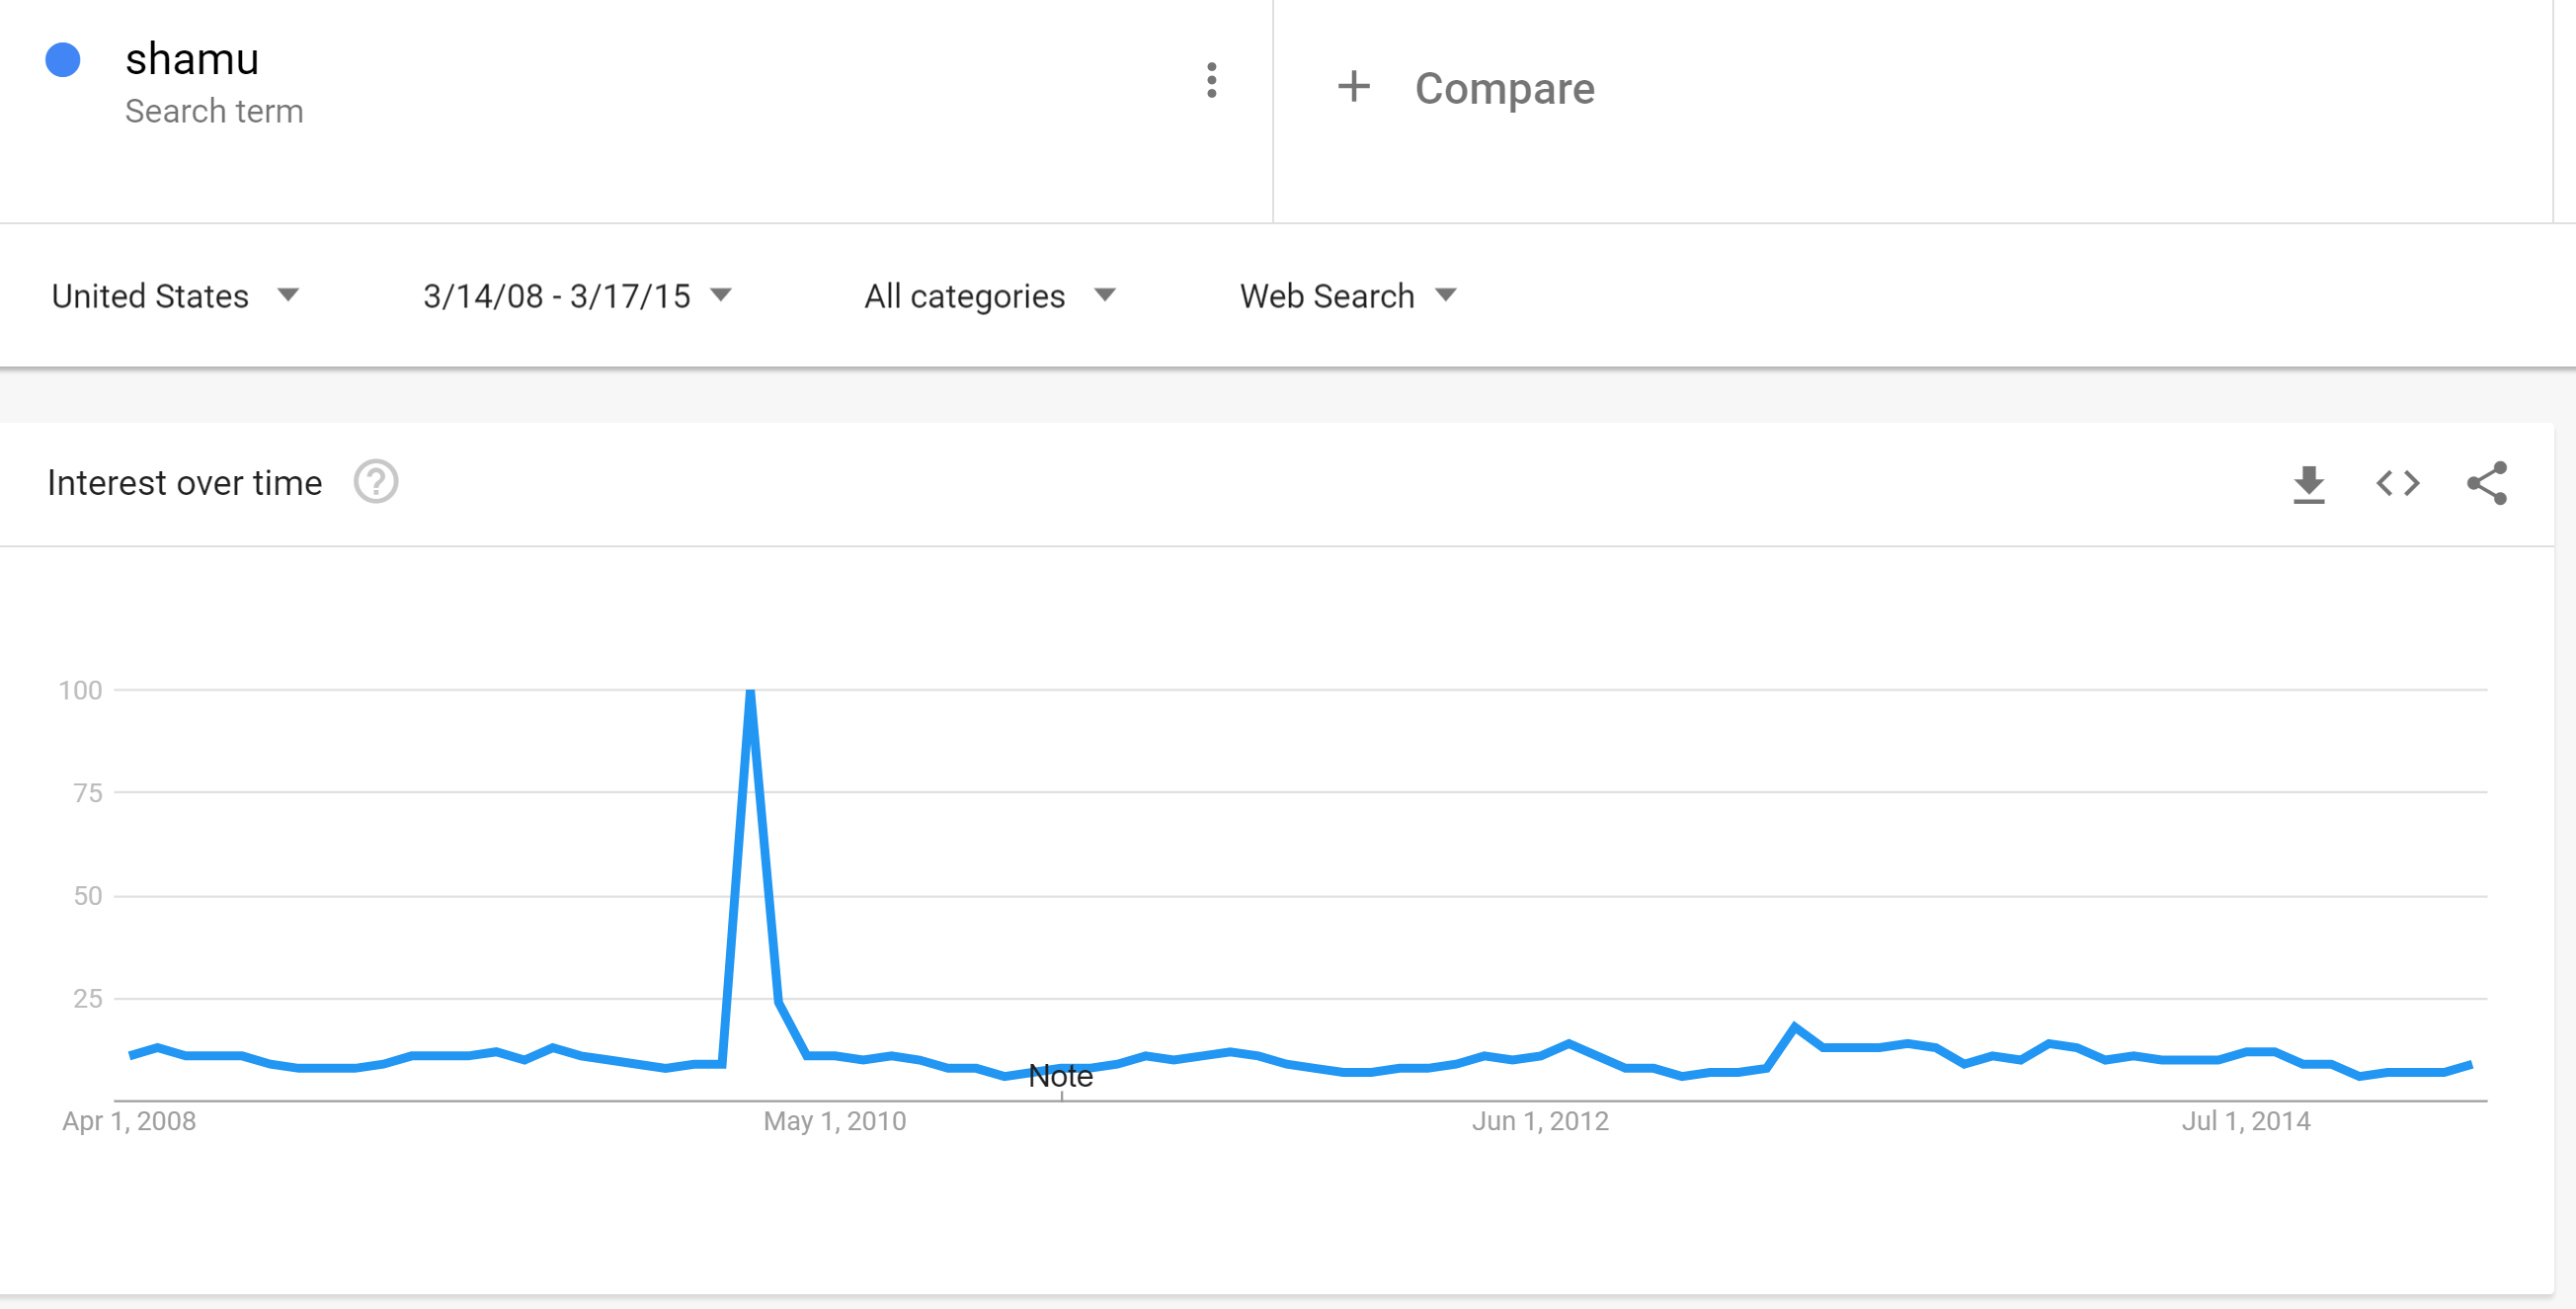

Looking at The Keyword "Shamu" on google trends reveals an incident with a Seaworld Orlando trainer who was killed during a show by a the killer Tilikum. Occuring In Feb 2010, this correlats to the increase in number of revews lower than 2.5 on our yelp analysis in Seaworld.